#  Creating new features 

## Getting additional features from the Alpha vantage API 

In [6]:
# imports 
import requests
import pandas as pd 

In [7]:
API_key = 'BPXVULLGKWW3Z16Y'

In [11]:
# Crypto rating 
symbol = 'BTC'
url = f'https://www.alphavantage.co/query?function=CRYPTO_RATING&symbol={symbol}&apikey={API_key}'
r = requests.get(url)
data = r.json()
df = pd.DataFrame(data)
print(df)

                         Crypto Rating (FCAS)
1. symbol                                 BTC
2. name                               Bitcoin
3. fcas rating                     Attractive
4. fcas score                             884
5. developer score                        831
6. market maturity score                  861
7. utility score                          954
8. last refreshed         2021-09-01 00:00:00
9. timezone                               UTC


In [14]:
url = f'https://www.alphavantage.co/query?function=CRYPTO_RATING&symbol=BTC&apikey={API_key}'
r = requests.get(url)
data = r.json()
df = pd.DataFrame(data)
print(df)

## Getting blockchain features from blockchain.info API 

In [18]:

url = 'https://blockchain.info/q/getdifficulty'
r = requests.get(url)
mining_difficulty = r.json()

mining_difficulty

17615033039278.0

In [19]:
url = 'https://blockchain.info/q/getblockcount'
r = requests.get(url)
block_count = r.json()
block_count

698536

In [25]:
hash = 'acbfff62093b5d682b29f0e5d1539e135cbd3d3c902b117b4785dda12b29e1e5'
url = f'https://blockchain.info/inv/{hash}?format=json'
r = requests.get(url)
r

<Response [404]>

## Transforming features to get technical analysis features

In [40]:
api_key='a58413697e8263de9c95cab92049ea3f'
symbol='BTCUSD'
query=f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?apikey={api_key}'
response=requests.get(query)
df = pd.DataFrame(response.json()['historical'])
df

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2021-09-01,46909.667969,47217.042969,46573.097656,47041.230469,47041.230469,3.593810e+10,3.593810e+10,131.56250,0.280,46943.79036,"September 01, 21",0.00280
1,2021-08-31,46940.296875,47195.351563,46787.875000,47179.195313,47179.195313,3.043963e+10,3.043963e+10,238.89844,0.509,47054.14063,"August 31, 21",0.00509
2,2021-08-30,48834.851563,48925.605469,46950.273438,47054.984375,47054.984375,3.184701e+10,3.184701e+10,-1779.86719,-3.645,47643.62109,"August 30, 21",-0.03645
3,2021-08-29,48911.250000,49644.113281,47925.855469,48829.832031,48829.832031,2.588965e+10,2.588965e+10,-81.41797,-0.166,48799.93359,"August 29, 21",-0.00166
4,2021-08-28,49072.585938,49283.503906,48499.238281,48902.402344,48902.402344,2.856810e+10,2.856810e+10,-170.18359,-0.347,48895.04818,"August 28, 21",-0.00347
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2016-09-05,608.989990,609.054993,602.242004,606.590027,606.590027,8.244680e+07,8.244680e+07,-2.39996,-0.394,605.96234,"September 05, 16",-0.00394
1823,2016-09-04,598.590027,611.836975,596.848022,608.633972,608.633972,9.794290e+07,9.794290e+07,10.04395,1.678,605.77299,"September 04, 16",0.01678
1824,2016-09-03,575.554993,599.500000,574.056030,598.211975,598.211975,1.590140e+08,1.590140e+08,22.65698,3.937,590.58934,"September 03, 16",0.03937
1825,2016-09-02,572.409973,575.643005,570.810974,575.536987,575.536987,7.991080e+07,7.991080e+07,3.12701,0.546,573.99699,"September 02, 16",0.00546


In [41]:
df['date']= pd.to_datetime(df['date'])

In [42]:
df.set_index('date', inplace = True)

In [43]:
df

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
date,,,,,,,,,,,,
2021-09-01,46909.667969,47217.042969,46573.097656,47041.230469,47041.230469,3.593810e+10,3.593810e+10,131.56250,0.280,46943.79036,"September 01, 21",0.00280
2021-08-31,46940.296875,47195.351563,46787.875000,47179.195313,47179.195313,3.043963e+10,3.043963e+10,238.89844,0.509,47054.14063,"August 31, 21",0.00509
2021-08-30,48834.851563,48925.605469,46950.273438,47054.984375,47054.984375,3.184701e+10,3.184701e+10,-1779.86719,-3.645,47643.62109,"August 30, 21",-0.03645
2021-08-29,48911.250000,49644.113281,47925.855469,48829.832031,48829.832031,2.588965e+10,2.588965e+10,-81.41797,-0.166,48799.93359,"August 29, 21",-0.00166
2021-08-28,49072.585938,49283.503906,48499.238281,48902.402344,48902.402344,2.856810e+10,2.856810e+10,-170.18359,-0.347,48895.04818,"August 28, 21",-0.00347
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-05,608.989990,609.054993,602.242004,606.590027,606.590027,8.244680e+07,8.244680e+07,-2.39996,-0.394,605.96234,"September 05, 16",-0.00394
2016-09-04,598.590027,611.836975,596.848022,608.633972,608.633972,9.794290e+07,9.794290e+07,10.04395,1.678,605.77299,"September 04, 16",0.01678
2016-09-03,575.554993,599.500000,574.056030,598.211975,598.211975,1.590140e+08,1.590140e+08,22.65698,3.937,590.58934,"September 03, 16",0.03937


### Computing moving averages

[None, None, None, None, None, None, None, None, None, None, None, None]

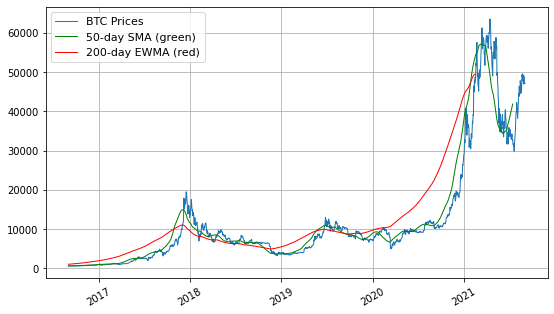

In [44]:
# Moving Averages Code

# Load the necessary packages and modules
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance
import pandas as pd

# Simple Moving Average 
def SMA(data, ndays): 
    SMA = pd.Series(data['close'].rolling(ndays).mean(), name = 'SMA') 
    data = data.join(SMA) 
    return data

# Exponentially-weighted Moving Average 
def EWMA(data, ndays): 
    EMA = pd.Series(data['close'].ewm(span = ndays, min_periods = ndays - 1).mean(), 
                 name = 'EWMA_' + str(ndays)) 
    data = data.join(EMA) 
    return data

# Retrieve the BTC data from our dataset:
data = df
close = data['close']

# Compute the 50-day 
SMA_NIFTY = SMA(data,n)
SMA_NIFTY = SMA_NIFTY.dropna()
SMA = SMA_NIFTY['SMA']

# Compute the 200-day EWMA 
ew = 200
EWMA_NIFTY = EWMA(data,ew)
EWMA_NIFTY = EWMA_NIFTY.dropna()
EWMA = EWMA_NIFTY['EWMA_200']

# Plotting the NIFTY Price Series chart and Moving Averages below
plt.figure(figsize=(9,5))
plt.plot(data['close'],lw=1, label='BTC Prices')
plt.plot(SMA,'g',lw=1, label='50-day SMA (green)')
plt.plot(EWMA,'r', lw=1, label='200-day EWMA (red)')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)

### Bollinger bands

<AxesSubplot:xlabel='date'>

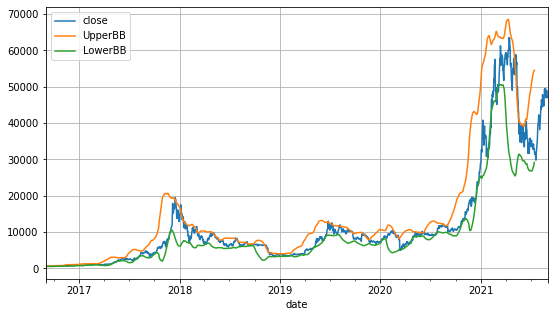

In [47]:
# Compute the Bollinger Bands 
def BBANDS(data, window=n):
    MA = data.close.rolling(window=n).mean()
    SD = data.close.rolling(window=n).std()
    data['UpperBB'] = MA + (2 * SD) 
    data['LowerBB'] = MA - (2 * SD)
    return data
 
# Compute the Bollinger Bands for NIFTY using the 50-day Moving average
n = 50
NIFTY_BBANDS = BBANDS(data, n)
#print(NIFTY_BBANDS)

# Create the plot
pd.concat([NIFTY_BBANDS.close,NIFTY_BBANDS.UpperBB,NIFTY_BBANDS.LowerBB],axis=1).plot(figsize=(9,5),grid=True)

### RSI

In [48]:
def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [50]:
rsi = rsi(df)

[None, None, None, None, None, None, None, None, None, None, None, None]

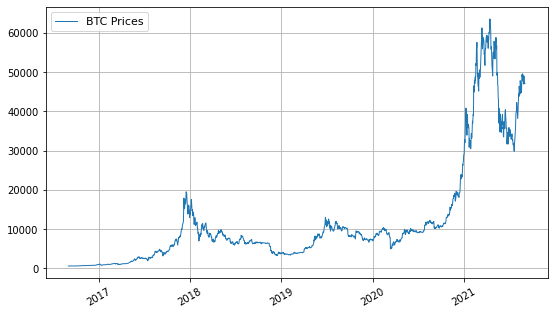

In [52]:
plt.figure(figsize=(9,5))
plt.plot(data['close'],lw=1, label='BTC Prices')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)

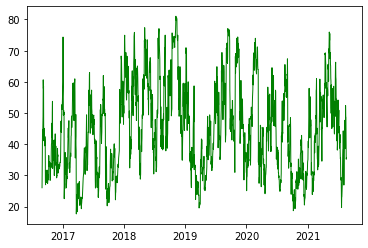

In [53]:
plt.plot(rsi,'g',lw=1, label='50-day SMA (green)')

### Standard deviation and volatility

In [69]:
import statistics as st
import numpy as np

In [72]:
# Calculate daily log return 
df['returns'] = (np.log(df.close /
    df.close.shift(-1)))

In [74]:
# calculate daily standard deviation of returns
daily_std = np.std(df.returns)

In [83]:
n= 14
# volatility is the 14 days standard deviation 
volatility = df.close.rolling(n).std(ddof=0)
df['volatility'] = volatility
df

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,UpperBB,LowerBB,returns,volatility
date,,,,,,,,,,,,,,,,
2021-09-01,46909.667969,47217.042969,46573.097656,47041.230469,47041.230469,3.593810e+10,3.593810e+10,131.56250,0.280,46943.79036,"September 01, 21",0.00280,NaN,NaN,-0.002929,NaN
2021-08-31,46940.296875,47195.351563,46787.875000,47179.195313,47179.195313,3.043963e+10,3.043963e+10,238.89844,0.509,47054.14063,"August 31, 21",0.00509,NaN,NaN,0.002636,NaN
2021-08-30,48834.851563,48925.605469,46950.273438,47054.984375,47054.984375,3.184701e+10,3.184701e+10,-1779.86719,-3.645,47643.62109,"August 30, 21",-0.03645,NaN,NaN,-0.037025,NaN
2021-08-29,48911.250000,49644.113281,47925.855469,48829.832031,48829.832031,2.588965e+10,2.588965e+10,-81.41797,-0.166,48799.93359,"August 29, 21",-0.00166,NaN,NaN,-0.001485,NaN
2021-08-28,49072.585938,49283.503906,48499.238281,48902.402344,48902.402344,2.856810e+10,2.856810e+10,-170.18359,-0.347,48895.04818,"August 28, 21",-0.00347,NaN,NaN,-0.003190,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-05,608.989990,609.054993,602.242004,606.590027,606.590027,8.244680e+07,8.244680e+07,-2.39996,-0.394,605.96234,"September 05, 16",-0.00394,650.387891,587.199350,-0.003364,6.730870
2016-09-04,598.590027,611.836975,596.848022,608.633972,608.633972,9.794290e+07,9.794290e+07,10.04395,1.678,605.77299,"September 04, 16",0.01678,647.949116,587.833044,0.017272,6.767386
2016-09-03,575.554993,599.500000,574.056030,598.211975,598.211975,1.590140e+08,1.590140e+08,22.65698,3.937,590.58934,"September 03, 16",0.03937,645.071115,588.356685,0.038642,7.514960


### Moving Average Convergence Divergence (MACD)